<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/Lab_07_6406021622095.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 7: Outlier Detection**
**คำสั่ง**

1.   ศึกษาวิธีการเติมข้อมูลสูญหายเบื้องต้นต่อไปนี้
2.   ทำการเติมข้อมูลสูญหายทุกตัวแปรด้วยวิธีที่เหมาะสม
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_07_XXXXXXXXXXXXX.ipynb โดย XXXXXXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_07_XXXXXXXXXXXXX.ipynb ที่ Google Classroom

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/DATASET/weight-height.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


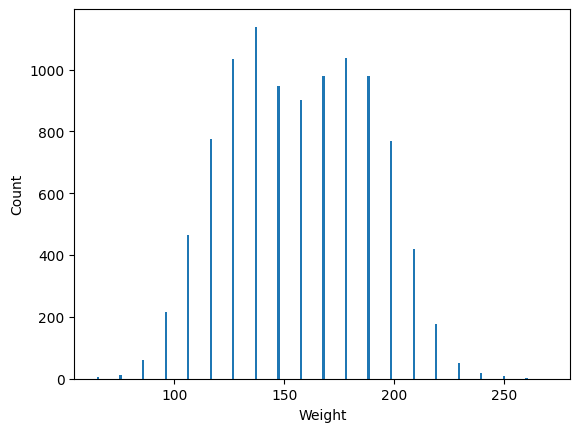

In [4]:
plt.hist(data.Weight, bins=20, width=1)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [5]:
data.Weight.describe()

,Weight
count,10000.000000
mean,161.440357
std,32.108439
min,64.700127
25%,135.818051
50%,161.212928
75%,187.169525
max,269.989699


**Outlier Detection using Z-score**

In [6]:
# detect extreme values of weight
threshold = 3

# calculate z-score of each data
data['zscore'] = (data.Weight - data.Weight.mean()) / data.Weight.std()

# find the data that the z-score is not in [-threshold, threshold]
data[(data['zscore']>threshold) | (data['zscore']< -1*threshold)]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711
9285,Female,54.263133,64.700127,-3.012922


ปฏิบัติการข้อ 1) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี z-score เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [9]:
# Answer here!
# detect extreme values of Height
threshold = 3

# calculate z-score of each data
data['zscore'] = (data.Height - data.Height.mean()) / data.Height.std()

# find the data that the z-score is not in [-threshold, threshold]
data[(data['zscore']>threshold) | (data['zscore']< -1*threshold)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


**Outlier Detection using DBSCAN**

In [8]:
clusterInd = DBSCAN(eps = 5, min_samples = 5).fit_predict(data.loc[:,['Weight']])
np.unique(clusterInd)  # -1 is noise

# retrieve the data that its cluster is -1
data[clusterInd == -1]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711
5360,Female,55.668202,68.982530,-2.879549
6624,Female,54.616858,71.393749,-2.804453
9285,Female,54.263133,64.700127,-3.012922


ปฏิบัติการข้อ 2) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วยวิธี DBSCAN เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [10]:
# Answer here!
clusterInd = DBSCAN(eps = 5, min_samples = 5).fit_predict(data.loc[:,['Height']])
np.unique(clusterInd)  # -1 is noise

# retrieve the data that its cluster is -1
data[clusterInd == -1]

,Gender,Height,Weight,zscore


**Outlier Detection using isolation forest**

In [11]:
# training the model
iforest = IsolationForest(n_estimators = 100).fit(data.loc[:,['Weight']])
scores = iforest.score_samples(data.loc[:,['Weight']])
print(np.min(scores),np.max(scores))

-0.7806482682690864 -0.4433789281364481


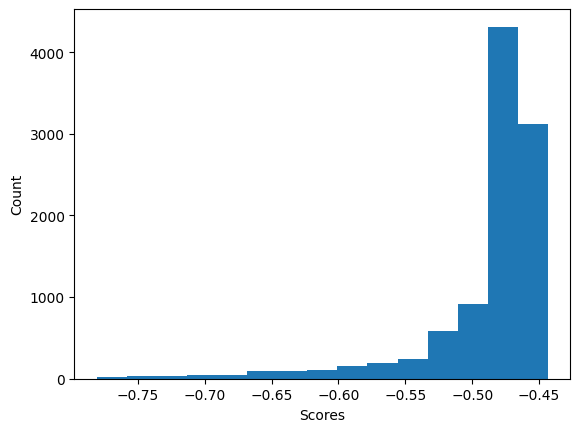

In [12]:
plt.hist(scores, bins=15)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

In [13]:
threshold = -0.76
# retrieve the data that its score is lower than threshold
data[scores < threshold]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1506,Male,75.698618,249.565628,2.425209
1610,Male,76.617546,255.863326,2.664045
1750,Male,74.604668,249.946283,2.140883
1896,Male,76.472880,246.232321,2.626445
2014,Male,78.998742,269.989699,3.282934
2070,Male,77.465569,252.556689,2.884452
2971,Male,75.156879,250.317151,2.284407
3228,Male,76.268668,247.386741,2.573369
3285,Male,78.528210,253.889004,3.160640


ปฏิบัติการข้อ 3) ใช้วิธีการตรวจหาข้อมูลผิดปรกติด้วย isolation forest เพื่อตรวจหาข้อมูลผิดปรกติของค่าตัวแปรความสูง

In [14]:
iforest = IsolationForest(n_estimators = 100).fit(data.loc[:,['Height']])
scores = iforest.score_samples(data.loc[:,['Height']])
print(np.min(scores),np.max(scores))

-0.7559250753981593 -0.44216479057463487


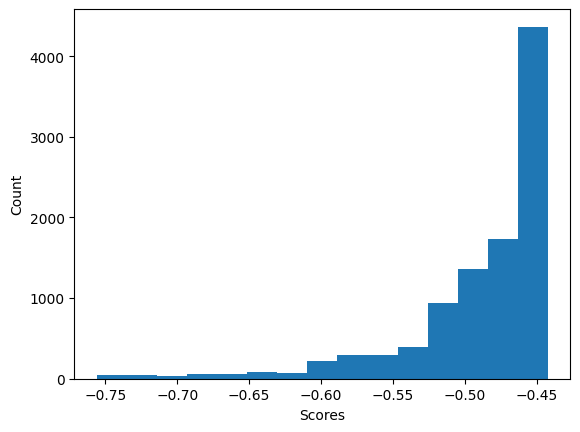

In [15]:
plt.hist(scores, bins=15)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()